In [41]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [42]:
data = pd.read_csv("D:\FreeLance work\dataset_1.csv")

In [43]:
threshold = 0.2
missing_percentage = data.isnull().sum() / len(data)
filtered_data = data.loc[:, missing_percentage <= threshold]

In [44]:
categorical_cols = filtered_data.select_dtypes(include=['object']).columns
numerical_cols = filtered_data.select_dtypes(exclude=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col].astype(str))
    label_encoders[col] = le

imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data_numerical = pd.DataFrame(imputer.fit_transform(filtered_data[numerical_cols]), columns=numerical_cols)

imputed_data = pd.concat([imputed_data_numerical, filtered_data[categorical_cols]], axis=1)

print(imputed_data.head())

   subject_id  los_hospital   age  glucose_mean  heart_rate_mean    sbp_mean  \
0  15252880.0          33.0  62.0    108.615385       127.960000   95.571429   
1  14873669.0          54.0  34.0     95.250000       109.038461  120.981482   
2  13288063.0          12.0  71.0    138.750000        67.600000  114.000000   
3  18893120.0           7.0  46.0    190.000000       136.120000  128.043478   
4  16425950.0          12.0  87.0    109.750000        68.727273  152.285714   

    dbp_mean   mbp_mean  resp_rate_mean  temperature_mean  ...  \
0  61.000000  80.964286       20.288462         37.850000  ...   
1  79.222222  95.629630       18.148148         36.824545  ...   
2  63.807692  77.000000       22.192308         36.963333  ...   
3  78.913043  90.045455       26.409091         36.890000  ...   
4  68.761905  90.333333       20.772727         36.860000  ...   

   malignant_cancer  severe_liver_disease  metastatic_solid_tumor  aids  \
0               0.0                   0.0      

In [45]:
X = imputed_data.drop('AKI', axis=1) 
y = imputed_data['AKI']

In [46]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [48]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [49]:
# Making Predictions
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]


In [50]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8899082568807339
AUC Score: 0.7480670103092784
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.89      1.00      0.94       194

    accuracy                           0.89       218
   macro avg       0.44      0.50      0.47       218
weighted avg       0.79      0.89      0.84       218

Confusion Matrix:
[[  0  24]
 [  0 194]]


C:\Users\shahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shahe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

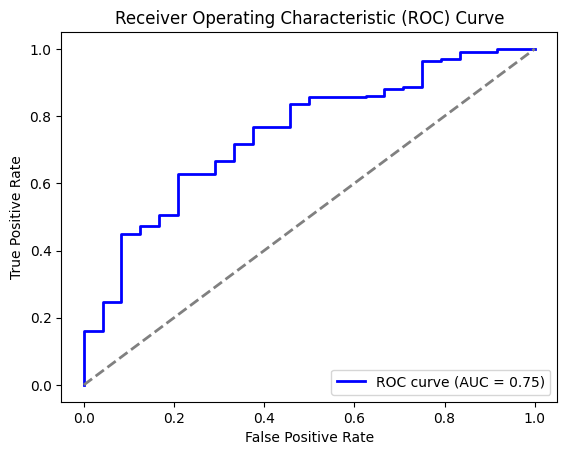

: 

In [ ]:
#  Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()